In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
import numpy as np
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split
# plotly and cufflinks need to be installed in anaconda prompt by using pip install
import plotly.express as px
import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)

In [2]:
df = pd.read_excel('Complete-dataset-Corné,Justin.xlsx')
# df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4684 entries, 0 to 4683
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Method name          4684 non-null   object 
 1   N (no. labs)         4684 non-null   object 
 2   Mean                 4602 non-null   float64
 3   Bias                 4058 non-null   float64
 4   CV                   4584 non-null   float64
 5   Sample               4684 non-null   object 
 6   Reference Value      4656 non-null   float64
 7   Year                 4684 non-null   int64  
 8   Source (CAP/EurA1c)  4684 non-null   object 
 9   Type (Fresh/frozen)  4684 non-null   object 
 10  Manufacturer         4684 non-null   object 
 11  Total Error          4684 non-null   float64
dtypes: float64(5), int64(1), object(6)
memory usage: 439.2+ KB


In [22]:
test = df.set_index('Manufacturer')
test = test.loc['Fisher']
test

,Method name,N (no. labs),Mean,Bias,CV,Sample,Reference Value,Year,Source (CAP/EurA1c),Type (Fresh/frozen),Total Error
Manufacturer,,,,,,,,,,,
Fisher,Thermo Fisher Scientific/Konelab,5,5.0,NaN,NaN,GH2-01,5.4,2007,CAP,Fresh,0.0
Fisher,Thermo Fisher Scientific/Konelab,5,11.0,NaN,NaN,GH2-02,11.6,2007,CAP,Fresh,0.0
Fisher,Thermo Fisher Scientific/Konelab,5,7.5,NaN,NaN,GH2-03,7.6,2007,CAP,Fresh,0.0


In [4]:
df2 = df.groupby(['Manufacturer','Year']).mean().reset_index()
df3 = df2.set_index('Manufacturer')
df4 = df.set_index('Manufacturer')
df5 = df3[['Year','Bias','CV','Total Error']]
df3

,Year,Mean,Bias,CV,Reference Value,Total Error
Manufacturer,,,,,,
Abbott,2006,8.155556,NaN,6.744444,8.444444,13.219111
Abbott,2007,8.233333,NaN,4.500000,8.516667,8.820000
Abbott,2008,8.400000,NaN,4.800000,8.466667,9.408000
Abbott,2009,7.158333,0.183333,5.366667,7.166667,10.610333
Abbott,2010,7.243333,0.026667,4.616667,7.216667,9.075333
...,...,...,...,...,...,...
Vitros,2017,7.529333,0.074000,2.626667,7.455333,5.222267
Vitros,2018,7.108000,-0.029333,2.573333,7.137333,5.014400
Vitros,2019,7.080635,0.407647,3.064706,7.041732,6.414471


In [28]:
df6 = df.groupby(['Manufacturer','Source (CAP/EurA1c)','Year']).mean().reset_index()
df6 = df6.set_index('Manufacturer')
# df6.head(20)
df6 = df6.drop(columns=['Mean','Bias','Reference Value','Total Error'])
df6.head(50)

KeyError: "['Mean' 'Reference Value' 'Total Error'] not found in axis"

In [33]:
df9 = df.groupby(['Manufacturer','Source (CAP/EurA1c)','Year']).mean().reset_index()
df9 = df9.set_index('Manufacturer')
# df9.head(20)
df9 = df9.drop(columns=['Mean','CV','Reference Value','Total Error'])
df9.head(50)

,Source (CAP/EurA1c),Year,Bias
Manufacturer,,,
Abbott,CAP,2006,NaN
Abbott,CAP,2007,NaN
Abbott,CAP,2008,NaN
Abbott,CAP,2009,0.183333
Abbott,CAP,2010,0.026667
Abbott,CAP,2011,-0.028333
Abbott,CAP,2012,0.141667
Abbott,CAP,2013,0.042222
Abbott,CAP,2014,0.119444


In [6]:
test = df6.loc['Bayer']
test

,Source (CAP/EurA1c),Year,CV
Manufacturer,,,
Bayer,CAP,2006,4.511111
Bayer,CAP,2007,4.641667
Bayer,CAP,2013,5.416667


In [55]:
df7 = df.groupby('Manufacturer').mean().dropna()
df7 = df7.sort_values(by='Total Error')
df7 = df7.drop(columns=['Mean','Bias','CV','Reference Value','Year'])
df7 = df7.reset_index()
df7.head()

,Manufacturer,Total Error
0,JEOL,1.780133
1,Arkray,2.268926
2,Alere,3.686413
3,Sebia,4.046414
4,Tosoh,4.497840


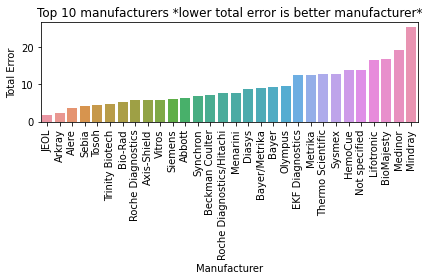

In [60]:
ax = sns.barplot(x="Manufacturer", y="Total Error", data=df7).set_title('Top 10 manufacturers *lower total error is better manufacturer*')
plt.xticks(rotation=90)
plt.tight_layout()

In [23]:
def plotCV(method):
#     print(df6.index.unique())
    df8 = df6.loc[[method]].reset_index()
    df8 = df8.drop(columns = 'Manufacturer')
    sns.lineplot(data=df8, x = 'Year', y = 'CV', hue = 'Source (CAP/EurA1c)')
    plt.xlim(2016, 2021)
    plt.ylim(0,8)
    plt.figure(figsize=(5, 5))

In [24]:
interact(plotCV, method=df6.index.unique())

interactive(children=(Dropdown(description='method', options=('Abbott', 'Alere', 'Arkray', 'Axis-Shield', 'Bay…

<function __main__.plotCV2(method)>

In [36]:
def plotBias(method):
#     print(df9.index.unique())
    df10 = df9.loc[[method]].reset_index()
    df10 = df10.drop(columns = 'Manufacturer')
    sns.lineplot(data=df, x = 'Year', y = 'Bias', hue = 'Source (CAP/EurA1c)')
    plt.xlim(2016, 2021)
    plt.ylim(0,8)
    plt.figure(figsize=(5, 5))

In [39]:
interact(plotBias, method=df6.index.unique())

interactive(children=(Dropdown(description='method', options=('Abbott', 'Alere', 'Arkray', 'Axis-Shield', 'Bay…

<function __main__.plotBias(method)>